In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image
import seaborn as sn
% matplotlib inline

In [2]:
tracks = pd.read_csv('fma_metadata/tracks.csv')#this is the database containing the description of each tracks
features = pd.read_csv('fma_metadata/features.csv')#this is the database containing the features of each tracks
genres=pd.read_csv('fma_metadata/genres.csv')

/home/marianne/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/marianne/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,1

# Part A: cleaning of the database

In this part, we clean the database and keep only the descriptive variables that are related to the genre of the data.

In [3]:
tracks['Unnamed: 0'].iloc[0] = tracks['Unnamed: 0'].iloc[1]

tracks.columns = [col[0:5] + '_' + tracks[col][0] for col in tracks.columns]
tracks.columns.values[0] = 'track_id'

tracks = tracks[2:]
tracks = tracks.reset_index(drop=True)

In [4]:
keep_variables = ['track_id','track_title','track_genre_top','track_genres','track_genres_all']
tracks = tracks[keep_variables]

In [5]:
features.columns = [col+ '_' + features[col][0] for col in features.columns]
features.columns.values[0] = 'track_id'

features = features[3:]
features = features.reset_index(drop=True)

Here, we merge the dataframe containing the description of the tracks and the dataframe containing the features. The dataframe df_final wil be the datafram that we will use for our work.
There is three variables that describe the genre of the song: the variable track_genre_top gives the main genre of the song. If the songs has multiple genres, it is Nan. Thhe track_genres variable gives a list containing the id of all the genres of the song. Track_genres_all gives a list containing the id of all the genres and subgenres of the song. The genre ids can be found in the genre.csv file.

In [6]:
df_final = pd.merge(tracks, features, on='track_id', how='inner')
df_final.to_csv('df_final.csv',index=False)

# Part B: Descriptive statistics on our cleaned database

Our database contains 19034 songs. Each song has a specific id and title and has 523 features that describe the song (fourier transform analysis, id, title, genre,subgenres etc). 

In [7]:
len(df_final)

19034

In [8]:
len(df_final.columns)

523

In [9]:
df_final.head()

,track_id,track_title,track_genre_top,track_genres,track_genres_all,chroma_cens_kurtosis,chroma_cens.1_kurtosis,chroma_cens.2_kurtosis,chroma_cens.3_kurtosis,chroma_cens.4_kurtosis,...,tonnetz.39_std,tonnetz.40_std,tonnetz.41_std,zcr_kurtosis,zcr.1_max,zcr.2_mean,zcr.3_median,zcr.4_min,zcr.5_skew,zcr.6_std
0,2,Food,Hip-Hop,[21],[21],7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
1,3,Electric Ave,Hip-Hop,[21],[21],1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02
2,5,This World,Hip-Hop,[21],[21],5.2756297588e-01,-7.7654317021e-02,-2.7961030602e-01,6.8588310480e-01,1.9375696182e+00,...,4.0730185807e-02,1.2690781616e-02,1.4759079553e-02,6.8084154129e+00,3.7500000000e-01,5.3114086390e-02,4.1503906250e-02,0.0000000000e+00,2.1933031082e+00,4.4860601425e-02
3,10,Freeway,Pop,[10],[10],3.7022454739e+00,-2.9119303823e-01,2.1967420578e+00,-2.3444947600e-01,1.3673638105e+00,...,7.4357867241e-02,1.7951935530e-02,1.3921394013e-02,2.1434211731e+01,4.5214843750e-01,7.7514506876e-02,7.1777343750e-02,0.0000000000e+00,3.5423245430e+00,4.0800448507e-02
4,20,Spiritual Level,NaN,"[76, 103]","[17, 10, 76, 103]",-1.9383698702e-01,-1.9852678478e-01,2.0154602826e-01,2.5855624676e-01,7.7520370483e-01,...,9.5002755523e-02,2.2492416203e-02,2.1355332807e-02,1.6669036865e+01,4.6972656250e-01,4.7224905342e-02,4.0039062500e-02,9.7656250000e-04,3.1898307800e+00,3.0992921442e-02


Let us study the different genres that exists in our database and how they are distributed. For this, we first create a tree in which every node is a genre, and the children of the node are the subgenres of the genre.

In [10]:
G = nx.DiGraph()
#Function that inputs the id of the genre and outputs the title of the genre
def get_title(genreid,genres=genres):
    return(genres.title[genres.genre_id==genreid].unique()[0])
#Function that inputs the title of the genre and outputs the id of the genre
def get_id(genretitle,genres=genres):
    return(genres.genre_id[genres.title==genretitle].unique()[0])
#Function that inputs the title of a genre and outputs the subgenres of the genre
def get_subgenres(genretitle,G=G):
    return([edge[1] for edge in G.edges(genretitle)])
    
    

In [11]:
G.add_node("Genres")
parents=genres.genre_id[genres.parent==0].unique()
for parent in parents:
    G.add_edge("Genres",get_title(parent))
while  not parents==[]:
    all_children=[]
    for parent in parents:
        children=genres.genre_id[genres.parent==parent].unique()
        all_children.extend(children)
        for child in children:
            G.add_edge(get_title(parent),get_title(child))
    parents=all_children
p=nx.drawing.nx_pydot.to_pydot(G)
p.write_png('Tree_genres.png')

/home/marianne/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


True

There is a total of 163 genres in our database, with 15 main genres. To illustrate how our graph works, let us look into the subgenres of all of our main genres.

In [19]:
len(G.nodes())

164

In [20]:
for i in get_subgenres("Genres"):
    print(i + " : "+ str(get_subgenres(i))+ "\n")

Instrumental : ['Soundtrack', 'New Age', 'Ambient']

Classical : ['Chamber Music', 'Opera', 'Choral Music', 'Symphony', 'Composed Music', '20th Century Classical', 'Contemporary Classical']

Spoken : ['Spoken Word', 'Spoken Weird', 'Banter', 'Poetry', 'Musical Theater', 'Radio', 'Radio Theater', 'Comedy']

Country : ['Country & Western', 'Bluegrass', 'Rockabilly', 'Americana']

Jazz : ['Jazz: Out', 'Jazz: Vocal', 'Free-Jazz', 'Big Band/Swing', 'Be-Bop', 'Modern Jazz']

Old-Time / Historic : []

Pop : ['Synth Pop', 'Experimental Pop']

Easy Listening : ['Lounge', 'Nu-Jazz', 'Easy Listening: Vocal']

Soul-RnB : ['Funk', 'Disco']

Hip-Hop : ['Hip-Hop Beats', 'Nerdcore', 'Wonky', 'Abstract Hip-Hop', 'Rap', 'Breakbeat', 'Alternative Hip-Hop']

Rock : ['Goth', 'Loud-Rock', 'Progressive', 'Indie-Rock', 'Rock Opera', 'Punk', 'Lo-Fi', 'Metal', 'Garage', 'New Wave', 'Psych-Rock', 'Post-Rock', 'Krautrock', 'Industrial', 'Shoegaze']

International : ['Europe', 'Celtic', 'Flamenco', 'Latin', 'Asia-

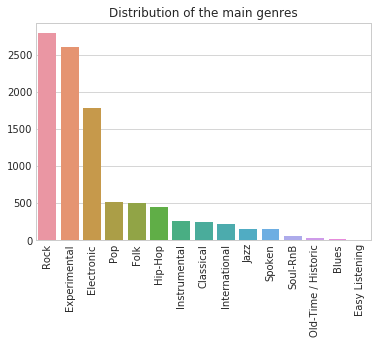

In [61]:
count=df_final.track_genre_top.value_counts()
sn.set_style("whitegrid")
plt.xticks(rotation=90)
sn.barplot(x=count.index,y=count.values)
plt.title("Distribution of the main genres")

Features.csv

Essentially, the way they created the ~500 columns of the features comes from running every function on the music analysis package “libROSA” on the given track, then computing the mean, standard deviation, skew, kurtosis, median, min, and max of that output. Therefore, each output from libROSA gives us at least 7 columns, and more on the functions that already output multiple columns. These functions are as such:

chroma_stft:
	Output: 12 columns, one for each note (there are 12 notes in an octave)
	End result: 12 x 7 = 84 columns

Starts out analysis with a fourier transform. Essentially finds what notes are playing at any given time. They use frame lengths of 2048 time units and skips of 512 time units (notice this means each frame overlaps significantly with its neighbors).

Intuitive understanding: the mean of the “G” column would be “How often/with what intensity is the note G being played in this song, in any octave (all functions use a range of 7 octaves, which should be enough for any average piece of music)?”

Usefulness to us: Basically none. How often a note is played says nothing about genre

chroma_cqt:
Essentially chroma_stft, but with a “Constant Q Transform” instead of a fourier transform.

chroma_cens:
	Same as above, but normalized.

tonnetz:
Output: 6 columns, Fifth x-axis, Fifth y-axis, Minor x-axis, Minor y-axis, Major x-axis, Major y-axis
End Result: 6 x 7 = 42 columns 

Takes as input one of the “chroma” functions’ outputs and creates kind of a relationship between the tones. I think the way this works is if a major chord is played, that goes into “Major y-axis” and if a major arpeggio is played, that goes into “Major x-axis”? Their documentation on this isn’t super clear, but I think it works this way for Major, Minor, and Dominant chords.

Intuitive understanding: the mean of the “Minor y-axis” column would be “how much/with what intensity are block minor chords played in the song?”

Usefulness to us: Reasonably important. Different genres will use different chords. 

mfcc:
	Output: 20 columns, one for each “coefficient”
	End result: 20 x 7 = 140 columns!

Their code first creates a mel-scale from the frequencies (it’s like a weird log scale that comes from a survey of human beings and is supposed to represent how well humans hear the differences in pitches?) and then it puts it through a ton of weird math that I don’t understand to get some sort of meaningful coefficients. 
 
Intuitive understanding: Here’s some info: https://en.wikipedia.org/wiki/Mel-frequency_cepstrum  If you manage to understand what’s going on, let me know. Apparently it’s very useful in doing voice-to-text stuff.

Usefulness to us: I don’t know why, but very important, according to the algorithm.

rmse:
	Output: 1 column, root mean squared energy
	End result: 1 x 7 = 7 columns

Takes in a spectrogram and calculates the root mean squared energy. I think this means it like tells you how loud the music is at different times. Seems pretty intuitive to me, if that’s correct. 

Usefulness to us: somewhat, as different genres may have different volume profiles. 

zcr:
	Output: 1 column, zero-crossing rate
	End result: 1 x 7 = 7 columns

I don’t know what it really means to “cross zero” in an audio sample, but I read that this is often used to “classify percussive sounds.” If that’s true, type of percussion is important to the genre of music and we should keep it in mind.

Usefulness to us: algorithm says not incredibly important, but still useful, as expected.

spectral_centroid: 
	Output: 1 column, centroid of the spectrogram at each frame.
	End result: 1 x 7 = 7 columns

It seems that for each frame of the stft we computed, they take the mean, so you essentially know where the “pitch center” of the song is at any given moment. Uses the same 2048, 512 sampling as before.

Usefulness to us: maybe not very important. Does it matter what pitch the sample is centered around?

spectral_bandwidth:
	Output: 1 column, standard deviation of the spectrogram at each frame.
	End result: 1 x 7 = 7 columns 

Looks like they take the standard deviation of the stft at every frame, so it’s essentially “how open is the chord?”

Usefulness to us: Quite useful. Certainly some genres use wider pitches than others 

spectral_contrast:
	Output: 6 columns, one for each octave
	End result: 6 x 7 = 42 columns 

From what I can see, first the stft is split into 6 octave-length subspectra, then the difference between the peaks and valleys is analyzed. http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=C570D8446DB5449A45052136A85349E9?doi=10.1.1.583.7201&rep=rep1&type=pdf
This paper gives some insight and compares it against MFCC which it says simply “averages each subspectrum” and therefore isn’t as good at classification. 

This quote from the paper is especially relevant for the intuition:
“For most music, the strong spectral peaks roughly correspond with harmonic components; while non-harmonic components, or noises, often appear at spectral valleys.”

Essentially, I think it looks at the differences between he harmonic and non-harmonic components of the music in each octave.

Usefulness to us: Top. Outperforms everything in the analysis and makes sense as to why it’s important.

Spectral_rolloff:
	Output: 1 column, rolloff at each frame
	End result: 1 x 7 = 7 columns 

Seems to be just at what rate the highs and lows of the song get softer or louder. Looks mostly meaningless.

	Usefulness to us: low. Analysis agrees that it’s not very useful.

